In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(160, 160, 3)  # smaller size
)

base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

2026-02-23 02:24:33.257937: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 02:24:33.935641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 02:24:33.938775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-23 02:24:36.088203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[0][0]']        

In [2]:
# Load images with label from directory

from tensorflow.keras.utils import image_dataset_from_directory

seed = 42
train_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/train',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)

val_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/validation',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)



Found 19051 files belonging to 4 classes.
Found 4780 files belonging to 4 classes.


In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
# test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [4]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


2026-02-23 02:24:48.059964: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 02:24:48.158583: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 02:24:48.190761: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 02:24:48.215209: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78643200 exceeds 10% of free system memory.
2026-02-23 02:24:48.250376: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80621568 exceeds 10% of free system memory.


596/596 [==============================] - 304s 503ms/step - loss: 0.9435 - accuracy: 0.6007 - val_loss: 0.7758 - val_accuracy: 0.6678
Epoch 2/10
596/596 [==============================] - 338s 567ms/step - loss: 0.7566 - accuracy: 0.6800 - val_loss: 0.6582 - val_accuracy: 0.7262
Epoch 3/10
596/596 [==============================] - 309s 518ms/step - loss: 0.6784 - accuracy: 0.7154 - val_loss: 0.6162 - val_accuracy: 0.7381
Epoch 4/10
596/596 [==============================] - 319s 534ms/step - loss: 0.6369 - accuracy: 0.7331 - val_loss: 0.6090 - val_accuracy: 0.7356
Epoch 5/10
596/596 [==============================] - 292s 490ms/step - loss: 0.5902 - accuracy: 0.7529 - val_loss: 0.6174 - val_accuracy: 0.7297
Epoch 6/10
596/596 [==============================] - 309s 519ms/step - loss: 0.5660 - accuracy: 0.7681 - val_loss: 0.5343 - val_accuracy: 0.7768
Epoch 7/10
596/596 [==============================] - 288s 483ms/step - loss: 0.5366 - accuracy: 0.7784 - val_loss: 0.5616 - val_accura

In [5]:
# delete unnecessary variables

del train_ds
del val_ds

In [6]:
#export model

model.save('../exports/models/pretrained_cnn.h5')

/home/samirshrestha/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


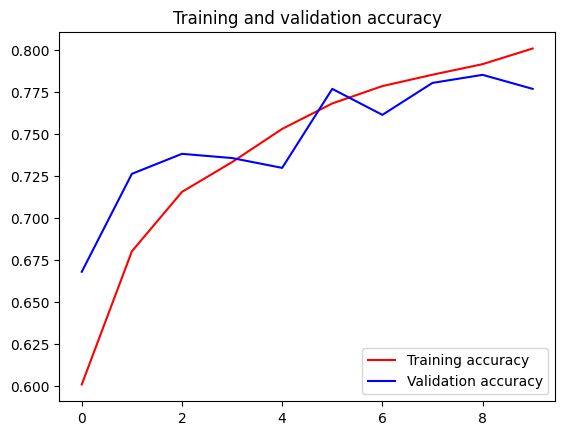

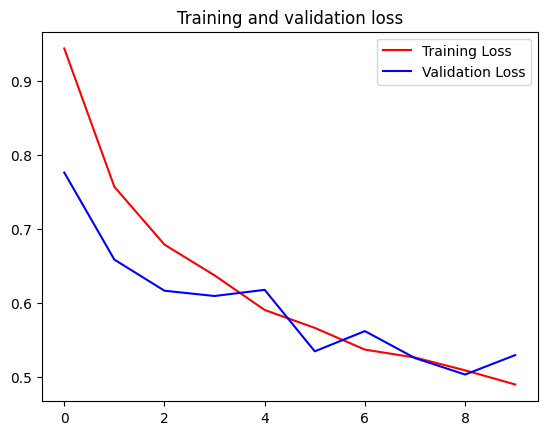

In [7]:
# Plot accuracy and loss curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [8]:
# load test data

test_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/test',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)

test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

Found 5950 files belonging to 4 classes.


In [9]:
# Evaluate model

test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

186/186 [==============================] - 77s 415ms/step - loss: 0.5220 - accuracy: 0.7770
Test accuracy: 0.7769747972488403


In [ ]:
import numpy as np
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)


186/186 [==============================] - 85s 457ms/step


AttributeError: '_MapDataset' object has no attribute 'labels'